# Showing Physical Activity Levels Among Adults in CA

https://data.chhs.ca.gov/dataset/adults-meeting-physical-activity-guidelines-lghc-indicator-16/resource/d824b0e4-b325-4935-82be-1936b0546128

This data set will go through my initial data exploration (cleaning and observing the data set) of a table that displays the percentages of adults meeting physical activity guidelines, as identified through the Let's Get Healthy California indicator at https://letsgethealthy.ca.gov/.

* According to the website above, "This table displays the percentage of adults meeting Aerobic Physical Activity guidelines in California. 
* The data are from the California Behavioral Risk Factor Surveillance Survey (BRFSS). The California BRFSS is an annual cross-sectional health-related telephone survey that collects data about California residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services."

After cleaning this data set to make it easier to work with, I will make some initial observations, then move onto the analysis of this cleaned data in a separate notebook within the data_analysis folder. I will be focusing mainly on the differences among age groups in percentages of those meeting physical activity guidelines. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
activity_df = pd.read_csv('../data/Raw/adults_meeting_physical_activity_guidelines.csv')

In [3]:
activity_df

,Geography,Year,Strata,Strata Name,Percent,Lower 95% CL,Upper 95% CL,Standard Error
0,California,2013,Total population,Total population,69.0782,67.6683,70.4881,0.7192
1,California,2013,Race-Ethnicity,White,75.8986,74.3168,77.4804,0.8069
2,California,2013,Race-Ethnicity,African-American,63.4425,56.9960,69.8891,3.2885
3,California,2013,Race-Ethnicity,Asian/Pacific Islander,61.3377,58.6958,63.9795,1.3477
4,California,2013,Race-Ethnicity,Hispanic,65.7066,60.1734,71.2398,2.8226
...,...,...,...,...,...,...,...,...
64,California,2017,Income,"$50,000 to $74,999",73.3338,66.5754,80.0922,3.4473
65,California,2017,Income,"$75,000 to $99,999",77.9233,70.4109,85.4357,3.8319
66,California,2017,Income,"$100,000 and above",85.7647,82.3292,89.2002,1.7523
67,California,2017,Sex,Male,71.7643,67.5703,75.9583,2.1393


Observations:

* It looks like we have 69 rows and 8 columns. 
* Similar to the other data sets collected through the Let's Get Healthy California indicator, this data set displays familiar columns I've worked with in the previous exploration folders. 

In [4]:
activity_df.sample(15)

,Geography,Year,Strata,Strata Name,Percent,Lower 95% CL,Upper 95% CL,Standard Error
66,California,2017,Income,"$100,000 and above",85.7647,82.3292,89.2002,1.7523
57,California,2017,Education,Less than high school,49.5693,42.6958,56.4427,3.5061
21,California,2013,Sex,Male,70.0242,67.8993,72.1491,1.0839
54,California,2017,Age,45 to 54 years,69.9560,63.6617,76.2504,3.2107
36,California,2015,Education,Some college,71.9967,68.4909,75.5026,1.7884
11,California,2013,Education,Less than high school,50.9941,47.1521,54.8360,1.9599
30,California,2015,Age,35 to 44 years,69.6839,65.0538,74.3140,2.3620
23,California,2015,Total population,Total population,71.6200,69.8336,73.4065,0.9113
31,California,2015,Age,45 to 54 years,69.2704,65.0923,73.4485,2.1314
2,California,2013,Race-Ethnicity,African-American,63.4425,56.9960,69.8891,3.2885


In [5]:
# Getting quick information about the data we're working with:

activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Geography       69 non-null     object 
 1   Year            69 non-null     int64  
 2   Strata          69 non-null     object 
 3   Strata Name     69 non-null     object 
 4   Percent         69 non-null     float64
 5   Lower 95% CL    69 non-null     float64
 6   Upper 95% CL    69 non-null     float64
 7   Standard Error  69 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.4+ KB


In [6]:
activity_df.columns

Index(['Geography', 'Year', 'Strata', 'Strata Name', 'Percent', 'Lower 95% CL',
       'Upper 95% CL', 'Standard Error'],
      dtype='object')

Since the rows are the same as the ones for the adult depression rates in CA data set, I will be renaming these columns to match what I've done previously:

In [7]:
# Renaming the columns to fit my preferences and for ease when coding:

cname_dict = {
    'Geography' : 'geo',
    'Year' : 'year',
    'Strata' : 'category',
    'Strata Name' : 'category_name',
    'Percent' : 'percent',
    'Lower 95% CL' : 'lower_cl',
    'Upper 95% CL' : 'upper_cl'
}

In [8]:
activity_df.rename(columns=cname_dict)

,geo,year,category,category_name,percent,lower_cl,upper_cl,Standard Error
0,California,2013,Total population,Total population,69.0782,67.6683,70.4881,0.7192
1,California,2013,Race-Ethnicity,White,75.8986,74.3168,77.4804,0.8069
2,California,2013,Race-Ethnicity,African-American,63.4425,56.9960,69.8891,3.2885
3,California,2013,Race-Ethnicity,Asian/Pacific Islander,61.3377,58.6958,63.9795,1.3477
4,California,2013,Race-Ethnicity,Hispanic,65.7066,60.1734,71.2398,2.8226
...,...,...,...,...,...,...,...,...
64,California,2017,Income,"$50,000 to $74,999",73.3338,66.5754,80.0922,3.4473
65,California,2017,Income,"$75,000 to $99,999",77.9233,70.4109,85.4357,3.8319
66,California,2017,Income,"$100,000 and above",85.7647,82.3292,89.2002,1.7523
67,California,2017,Sex,Male,71.7643,67.5703,75.9583,2.1393


In [9]:
activity_df = activity_df.rename(columns=cname_dict)

In [11]:
activity_df.head()

,geo,year,category,category_name,percent,lower_cl,upper_cl,Standard Error
0,California,2013,Total population,Total population,69.0782,67.6683,70.4881,0.7192
1,California,2013,Race-Ethnicity,White,75.8986,74.3168,77.4804,0.8069
2,California,2013,Race-Ethnicity,African-American,63.4425,56.9960,69.8891,3.2885
3,California,2013,Race-Ethnicity,Asian/Pacific Islander,61.3377,58.6958,63.9795,1.3477
4,California,2013,Race-Ethnicity,Hispanic,65.7066,60.1734,71.2398,2.8226


In [12]:
activity_df.tail()

,geo,year,category,category_name,percent,lower_cl,upper_cl,Standard Error
64,California,2017,Income,"$50,000 to $74,999",73.3338,66.5754,80.0922,3.4473
65,California,2017,Income,"$75,000 to $99,999",77.9233,70.4109,85.4357,3.8319
66,California,2017,Income,"$100,000 and above",85.7647,82.3292,89.2002,1.7523
67,California,2017,Sex,Male,71.7643,67.5703,75.9583,2.1393
68,California,2017,Sex,Female,69.4562,65.9808,72.9316,1.7728


In [13]:
activity_df['category_name'].unique()

array(['Total population', 'White', 'African-American',
       'Asian/Pacific Islander', 'Hispanic', 'Other', '18 to 34 years',
       '35 to 44 years', '45 to 54 years', '55 to 64 years',
       '65 years and above', 'Less than high school',
       'High school graduate', 'Some college', 'College graduate',
       'Less than $20,000', '$20,000 to $34,999', '$35,000 to $49,999',
       '$50,000 to $74,999', '$75,000 to $99,999', '$100,000 and above',
       'Male', 'Female'], dtype=object)

Since I am working with the column names I want, and I know that I'm interested in differences among age group with a specific focus on the 55 to 64 age group, I will move into my analysis of this data set in the other notebook I mentioned. 

Before that, I am going to make sure I save this cleaned data set in my data folder so that I can easily reference it in my analysis notebook:

In [14]:
# Saving the cleaned data to my folder:

activity_df.to_csv('../data/Cleaned/physical_activity_CLEANED.csv', index=False)

With that, I will go into making deeper observations through data analysis and hopefully arriving at some interesting insights in the other notebook!

In [14]:
# Using the groupby function to look at specific categories and the physical activity levels:
activity_df.groupby(['year','category','category_name'])['percent'].mean().to_frame()

percent
year category         category_name              
2013 Age              18 to 34 years      71.1897
                      35 to 44 years      64.5594
                      45 to 54 years      69.1638
                      55 to 64 years      70.3753
                      65 years and above  68.7360
...                                           ...
2017 Race-Ethnicity   Other               78.6266
                      White               77.5608
     Sex              Female              69.4562
                      Male                71.7643
     Total population Total population    70.5270

[69 rows x 1 columns]

### Observations

* I'm interested in the physical activity levels among different age groups, to see if any of this data can help explain the levels of depression rates among those same age groups that I found earlier.
* There's data from 2013 to 2017; the "percent" column is telling us the percentage of adults meeting physical activity guidelines; right from 2013 we can see that the youngest age group is most active (71.19%) and least active is 35 to 44, but we'll see if there are any notable patterns throughout the years.

In [15]:
activity_df[activity_df['category']=='Age'][['year', 'percent']]

,year,percent
6,2013,71.1897
7,2013,64.5594
8,2013,69.1638
9,2013,70.3753
10,2013,68.7360
29,2015,72.6642
30,2015,69.6839
31,2015,69.2704
32,2015,72.8096
33,2015,73.4498


^ not really sure what this is telling me

In [16]:
# Creating a filter for age:

age_filter = activity_df['category'] == 'Age'

age_activity_df = activity_df[age_filter]

age_grouped = age_activity_df.groupby(['year', 'category_name'])['percent'].sum().unstack()

age_grouped

category_name,18 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and above
year,,,,,
2013,71.1897,64.5594,69.1638,70.3753,68.7360
2015,72.6642,69.6839,69.2704,72.8096,73.4498
2017,70.4639,73.0860,69.9560,67.0844,71.7753


### Observation 
Interesting!!! 
* 18-34 year age group overall % decreased throughout the years, 35-44 increased, 45-54 didn't change much (very very small increase of about 0.7%), 55-64 decreased the most! and 65+ overall increased % of those meeting physical activity guidelines.
* 55-64 year age group has experienced an overall decrease in physical activity from 2013 to 2017!!! It went from 70.38% in 2013, up 2 percent points in 2015, before dropping to 67.08% in 2017. Possible explanation that could contribute to high depression rates.

<AxesSubplot:xlabel='year'>

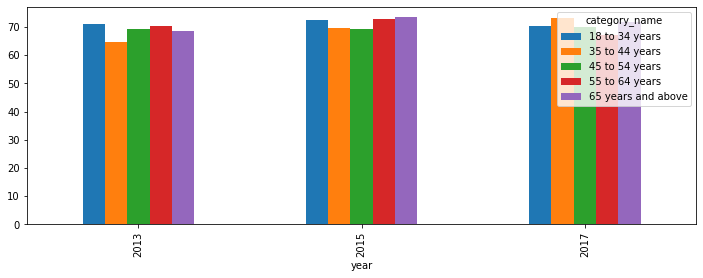

In [17]:
# To see it visually on a plot:
age_grouped.plot(kind='bar', figsize=(12,4))

I think the table does a better job of showing the differences, this plot is just confusing but it's relaying the same message. Overall there aren't drastic changes in the % of adults meeting physical activity guidelines throughout the age groups, but there are certain changes we can observe.

In [18]:
# Creating a filter for sex:

sex_filter = activity_df['category'] == 'Sex'

sex_activity_df = activity_df[sex_filter]

sex_grouped = sex_activity_df.groupby(['year', 'category_name'])['percent'].sum().unstack()

sex_grouped

category_name,Female,Male
year,,
2013,68.1760,70.0242
2015,72.3509,70.8392
2017,69.4562,71.7643


In [19]:
# Creating a race filter because I'm curious:

race_filter = activity_df['category'] == 'Race-Ethnicity'

race_activity_df = activity_df[race_filter]

race_grouped = race_activity_df.groupby(['year', 'category_name'])['percent'].sum().unstack()

race_grouped

category_name,African-American,Asian/Pacific Islander,Hispanic,Other,White
year,,,,,
2013,63.4425,61.3377,65.7066,80.7474,75.8986
2015,74.3893,75.6605,62.0486,79.8036,76.6827
2017,58.3466,70.3930,61.1582,78.6266,77.5608
